### 层次聚类（hierarchical clustering）试图在不同的层次对数据集进行划分，从而形成树形的聚类结构。

AGNES(AGglomerative NESting)是一种自底向上聚合策略的层次聚类算法。他先将数据集中的每个样本看作一个初始聚类簇，然后在算法运行的每一步中找出距离最近的两个聚类簇并进行合并，该过程不断重复，直至达到预设的聚类簇个数。这里的关键是如何计算聚类簇之间的距离。

常见距离计算方法。1.最小距离，取两簇之间最短距离——此时AGNES算法被称为单链接（single-linkage）算法；2.最大距离，顾名思义——此时AGNES算法被称为全链接（complete-linkage）算法；3.平均距离——均链接（average-linkage）算法

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import copy
import random
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']

#### 数据处理

In [2]:
dataSet = pd.read_excel(r'D:\a学业信计\a研究生\数据集\西瓜书\watermelon4.0.xlsx')
data = dataSet.values
labels = dataSet.columns.values
indexs = dataSet.index.values
data = data.tolist()

#### 定义函数

In [3]:
def EuclideanMetric(x, y):
    #定义距离函数，计算欧氏距离
    return np.sqrt(sum(pow(np.array(x) - np.array(y), 2)))

In [17]:
def show_now_kmeans(C, k):
    #根据当前划分结果绘制聚类图象
    colors = ['b', 'y', 'g', 'c', 'k', 'r', 'm', 'orange', 'mistyrose', 'gold']
    plt.figure()
    for i in range(k):
        plt.plot(np.array(C[i])[:,0], np.array(C[i])[:,1], colors[i] + '.', label = '类别' + str(i + 1))
    
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])

In [18]:
def distance_metric(C_i, C_j):
    #返回两个簇之间的距离矩阵
    dist_metric = np.zeros((len(C_i), len(C_j)))
    for i in range(len(C_i)):
        for j in range(len(C_j)):
            dist_metric[i][j] = EuclideanMetric(C_i[i], C_j[j])
    return dist_metric

def d_min(C_i, C_j):
    #返回两个簇之间的最小距离
    return distance_metric(C_i, C_j).min()

def d_max(C_i, C_j):
    #返回两个簇之间的最大值
    return distance_metric(C_i, C_j).max()

def d_avg(C_i, C_j):
    #返回两个簇之间的平均距离
    return np.sum(distance_metric(C_i, C_j)) / (len(C_i) * len(C_j))
    

In [19]:
print(distance_metric([[1,2],[1,4]],[[5,6]]))
print(d_avg([[1,2],[1,4]],[[5,6],[6,7]]))

[[5.65685425]
 [4.47213595]]
5.757752477800684


In [20]:
def AGNES(data, dist, k):
    '''
    data:数据集
    dist:度量函数
    k:聚类簇数
    '''
    C = []#簇集合
    for i in range(len(data)):#初始化单样本聚类簇
        C_i = []
        C_i.append(data[i])
        C.append(C_i)
    #print(C)#check
    
    all_C_metric = np.ones((len(data), len(data))) * 100
    for i in range(len(data)):#初始化聚类簇距离矩阵
        for j in range(i + 1, len(data)):
            all_C_metric[i][j] = dist(C[i], C[j])
            all_C_metric[j][i] = all_C_metric[i][j]
    
    q = len(data)#设置当前簇聚类个数
    while q > k:
        min_index = np.unravel_index(all_C_metric.argmin(), all_C_metric.shape) 
        j = max(min_index)
        i = min(min_index)
        C[i].extend(C[j])#合并两个聚类簇
        #for j in range(j + 1, q):#重新编号后面的聚类簇
        #    C[j - 1] = C[j]
        C.pop(j)
        
        #print('检查', q, len(C))#check应该是每次都减一
        all_C_metric = np.delete(all_C_metric, j, axis = 0)
        all_C_metric = np.delete(all_C_metric, j, axis = 1)#删除距离矩阵all_C_metric的第j行j列
        for j in range(q - 1):#更新距离矩阵
            all_C_metric[i][j] = dist(C[i], C[j])
            all_C_metric[j][i] = all_C_metric[j][i]
            all_C_metric[i][i] = 100
        q -= 1
    return C

In [27]:
k = 4
C = AGNES(data, d_max, k)

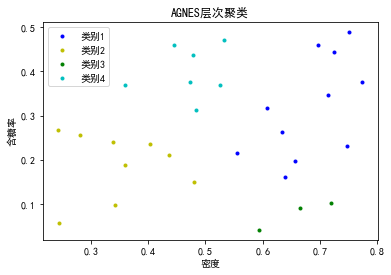

In [28]:
show_now_kmeans(C, k)
plt.title('AGNES层次聚类')
plt.legend()

#### 问：AGNES算法使用最小距离和最大距离的区别？

分析：最小距离要合并的是两个簇边界最短的簇，适合簇内联系区别较大的情况，也就是要分类的类别数量比较大，比如一种样本的数量占大多数。最大距离比较更平均地进行划分。

### 使用sklearn方法实现层次聚类